<a href="https://colab.research.google.com/github/siyoyoCode/EAD_prediction/blob/csv-data-analysis/Melcher_Lab_Allograft_Dysfunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #statistical plotting library

In [2]:
from numpy import genfromtxt

In [86]:
df = pd.read_csv("/content/drive/MyDrive/liver_data.csv")

In [87]:
df

,FOR AI STUDY PATIENT #,yeartxp,gender,ageattxp,donortype,Surgeon %MaS MEAN (A-E),Pathologist %MaS MEAN (A-E),HALO %MaS MEAN,U-Net %MaS MEAN,EAD,EAD by TBil,EAD by INR,EAD by AST/ALT,EAD by AST/ALT + INR,EAD by AST/ALT + Tbil,EAD by AST/ALT + Tbil + INR
0,1,2020,0,60,CAD,8.00,7.0,5.14,12.41,1,0,0,1,0,0,0
1,2,2020,0,68,CAD,1.40,0.8,1.91,3.63,0,0,0,0,0,0,0
2,3,2020,1,54,CAD,0.00,0.0,2.89,3.30,0,0,0,0,0,0,0
3,4,2020,0,72,CAD,15.00,13.0,7.35,17.37,1,0,1,0,0,0,0
4,5,2020,1,58,CAD,3.75,2.0,2.19,3.26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,243,2021,0,69,CAD,0.00,0.0,0.76,8.34,0,0,0,0,0,0,0
207,246,2021,0,68,CAD,0.40,0.6,1.24,1.87,0,0,0,0,0,0,0
208,248,2021,0,69,CAD,0.00,0.0,0.84,3.95,0,0,0,0,0,0,0
209,249,2021,1,22,CAD,0.00,0.0,0.86,2.48,0,0,0,0,0,0,0


In [96]:
df["EAD"].value_counts()

EAD
0    169
1     42
Name: count, dtype: int64

# One-Hot Encoding

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
encoder = OneHotEncoder()

In [14]:
pd.get_dummies(df.donortype) #gives us the categories for the donortype

,CAD,DCD
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
206,True,False
207,True,False
208,True,False
209,True,False


In [15]:
df["donortype"].value_counts() #more CAD than DCD donors

donortype
CAD    165
DCD     46
Name: count, dtype: int64

In [16]:
encoded_df = encoder.fit_transform(df[["donortype"]])

In [17]:
encoded_df = pd.DataFrame(encoded_df.toarray(), columns=encoder.get_feature_names_out(["donortype"]))

In [18]:
encoded_df

,donortype_CAD,donortype_DCD
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
206,1.0,0.0
207,1.0,0.0
208,1.0,0.0
209,1.0,0.0


In [19]:
df = pd.concat([df, encoded_df], axis = 1)

In [20]:
df

,FOR AI STUDY PATIENT #,yeartxp,gender,ageattxp,donortype,Surgeon %MaS MEAN (A-E),Pathologist %MaS MEAN (A-E),HALO %MaS MEAN,U-Net %MaS MEAN,EAD,EAD by TBil,EAD by INR,EAD by AST/ALT,EAD by AST/ALT + INR,EAD by AST/ALT + Tbil,EAD by AST/ALT + Tbil + INR,donortype_CAD,donortype_DCD
0,1,2020,0,60,CAD,8.00,7.0,5.14,12.41,1,0,0,1,0,0,0,1.0,0.0
1,2,2020,0,68,CAD,1.40,0.8,1.91,3.63,0,0,0,0,0,0,0,1.0,0.0
2,3,2020,1,54,CAD,0.00,0.0,2.89,3.30,0,0,0,0,0,0,0,1.0,0.0
3,4,2020,0,72,CAD,15.00,13.0,7.35,17.37,1,0,1,0,0,0,0,1.0,0.0
4,5,2020,1,58,CAD,3.75,2.0,2.19,3.26,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,243,2021,0,69,CAD,0.00,0.0,0.76,8.34,0,0,0,0,0,0,0,1.0,0.0
207,246,2021,0,68,CAD,0.40,0.6,1.24,1.87,0,0,0,0,0,0,0,1.0,0.0
208,248,2021,0,69,CAD,0.00,0.0,0.84,3.95,0,0,0,0,0,0,0,1.0,0.0
209,249,2021,1,22,CAD,0.00,0.0,0.86,2.48,0,0,0,0,0,0,0,1.0,0.0


In [21]:
df = df.drop('donortype', axis=1)

In [22]:
df #now the categorical column donortype has been encoded and is gone

,FOR AI STUDY PATIENT #,yeartxp,gender,ageattxp,Surgeon %MaS MEAN (A-E),Pathologist %MaS MEAN (A-E),HALO %MaS MEAN,U-Net %MaS MEAN,EAD,EAD by TBil,EAD by INR,EAD by AST/ALT,EAD by AST/ALT + INR,EAD by AST/ALT + Tbil,EAD by AST/ALT + Tbil + INR,donortype_CAD,donortype_DCD
0,1,2020,0,60,8.00,7.0,5.14,12.41,1,0,0,1,0,0,0,1.0,0.0
1,2,2020,0,68,1.40,0.8,1.91,3.63,0,0,0,0,0,0,0,1.0,0.0
2,3,2020,1,54,0.00,0.0,2.89,3.30,0,0,0,0,0,0,0,1.0,0.0
3,4,2020,0,72,15.00,13.0,7.35,17.37,1,0,1,0,0,0,0,1.0,0.0
4,5,2020,1,58,3.75,2.0,2.19,3.26,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,243,2021,0,69,0.00,0.0,0.76,8.34,0,0,0,0,0,0,0,1.0,0.0
207,246,2021,0,68,0.40,0.6,1.24,1.87,0,0,0,0,0,0,0,1.0,0.0
208,248,2021,0,69,0.00,0.0,0.84,3.95,0,0,0,0,0,0,0,1.0,0.0
209,249,2021,1,22,0.00,0.0,0.86,2.48,0,0,0,0,0,0,0,1.0,0.0


In [23]:
result = df.pop("EAD")

In [24]:
result

0      1
1      0
2      0
3      1
4      0
      ..
206    0
207    0
208    0
209    0
210    1
Name: EAD, Length: 211, dtype: int64

In [25]:
df.insert(16, "EAD", result)

In [26]:
df

,FOR AI STUDY PATIENT #,yeartxp,gender,ageattxp,Surgeon %MaS MEAN (A-E),Pathologist %MaS MEAN (A-E),HALO %MaS MEAN,U-Net %MaS MEAN,EAD by TBil,EAD by INR,EAD by AST/ALT,EAD by AST/ALT + INR,EAD by AST/ALT + Tbil,EAD by AST/ALT + Tbil + INR,donortype_CAD,donortype_DCD,EAD
0,1,2020,0,60,8.00,7.0,5.14,12.41,0,0,1,0,0,0,1.0,0.0,1
1,2,2020,0,68,1.40,0.8,1.91,3.63,0,0,0,0,0,0,1.0,0.0,0
2,3,2020,1,54,0.00,0.0,2.89,3.30,0,0,0,0,0,0,1.0,0.0,0
3,4,2020,0,72,15.00,13.0,7.35,17.37,0,1,0,0,0,0,1.0,0.0,1
4,5,2020,1,58,3.75,2.0,2.19,3.26,0,0,0,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,243,2021,0,69,0.00,0.0,0.76,8.34,0,0,0,0,0,0,1.0,0.0,0
207,246,2021,0,68,0.40,0.6,1.24,1.87,0,0,0,0,0,0,1.0,0.0,0
208,248,2021,0,69,0.00,0.0,0.84,3.95,0,0,0,0,0,0,1.0,0.0,0
209,249,2021,1,22,0.00,0.0,0.86,2.48,0,0,0,0,0,0,1.0,0.0,0


In [27]:
ead_labels = df["EAD"]

In [28]:
features = df.iloc[:, :16]

In [29]:
ead_labels

0      1
1      0
2      0
3      1
4      0
      ..
206    0
207    0
208    0
209    0
210    1
Name: EAD, Length: 211, dtype: int64

# Split into test/train

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = features
y = ead_labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
X_train #141 = 0.66 * 211

,FOR AI STUDY PATIENT #,yeartxp,gender,ageattxp,Surgeon %MaS MEAN (A-E),Pathologist %MaS MEAN (A-E),HALO %MaS MEAN,U-Net %MaS MEAN,EAD by TBil,EAD by INR,EAD by AST/ALT,EAD by AST/ALT + INR,EAD by AST/ALT + Tbil,EAD by AST/ALT + Tbil + INR,donortype_CAD,donortype_DCD
35,41,2020,0,20,0.6,0.0,1.24,7.63,0,0,0,0,0,0,1.0,0.0
28,31,2020,0,53,0.4,0.0,0.74,1.77,0,0,0,0,0,0,1.0,0.0
42,48,2020,1,56,0.4,0.0,1.98,5.43,0,0,0,0,0,0,1.0,0.0
136,158,2021,0,58,0.8,10.0,2.17,8.62,0,0,0,0,0,0,0.0,1.0
197,230,2021,0,65,11.0,15.0,4.87,4.99,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,124,2021,0,54,15.0,25.0,5.40,16.73,0,0,0,0,0,0,1.0,0.0
14,15,2020,0,59,0.0,0.0,1.70,2.96,0,0,0,0,0,0,0.0,1.0
92,106,2020,0,68,0.0,0.0,0.64,2.26,0,0,0,0,0,0,1.0,0.0
179,207,2021,0,59,0.2,1.0,0.88,2.89,0,0,1,0,0,0,0.0,1.0


# Standardize the Data

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler_object = MinMaxScaler()

In [36]:
scaler_object.fit(X_train)

MinMaxScaler()

In [37]:
scaled_X_train = scaler_object.transform(X_train)

In [38]:
scaled_X_test = scaler_object.transform(X_test)

In [39]:
X_train.max()

FOR AI STUDY PATIENT #          250.00
yeartxp                        2021.00
gender                            1.00
ageattxp                         74.00
Surgeon %MaS MEAN (A-E)          42.00
Pathologist %MaS MEAN (A-E)      72.00
HALO %MaS MEAN                   15.24
U-Net %MaS MEAN                  24.40
EAD by TBil                       1.00
EAD by INR                        1.00
EAD by AST/ALT                    1.00
EAD by AST/ALT + INR              1.00
EAD by AST/ALT + Tbil             1.00
EAD by AST/ALT + Tbil + INR       1.00
donortype_CAD                     1.00
donortype_DCD                     1.00
dtype: float64

In [40]:
scaled_X_train.max()

1.0000000000000002

In [41]:
scaled_X_train

array([[0.16064257, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.12048193, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.18875502, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.42168675, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.82730924, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.46586345, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [42]:
X_train

,FOR AI STUDY PATIENT #,yeartxp,gender,ageattxp,Surgeon %MaS MEAN (A-E),Pathologist %MaS MEAN (A-E),HALO %MaS MEAN,U-Net %MaS MEAN,EAD by TBil,EAD by INR,EAD by AST/ALT,EAD by AST/ALT + INR,EAD by AST/ALT + Tbil,EAD by AST/ALT + Tbil + INR,donortype_CAD,donortype_DCD
35,41,2020,0,20,0.6,0.0,1.24,7.63,0,0,0,0,0,0,1.0,0.0
28,31,2020,0,53,0.4,0.0,0.74,1.77,0,0,0,0,0,0,1.0,0.0
42,48,2020,1,56,0.4,0.0,1.98,5.43,0,0,0,0,0,0,1.0,0.0
136,158,2021,0,58,0.8,10.0,2.17,8.62,0,0,0,0,0,0,0.0,1.0
197,230,2021,0,65,11.0,15.0,4.87,4.99,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,124,2021,0,54,15.0,25.0,5.40,16.73,0,0,0,0,0,0,1.0,0.0
14,15,2020,0,59,0.0,0.0,1.70,2.96,0,0,0,0,0,0,0.0,1.0
92,106,2020,0,68,0.0,0.0,0.64,2.26,0,0,0,0,0,0,1.0,0.0
179,207,2021,0,59,0.2,1.0,0.88,2.89,0,0,1,0,0,0,0.0,1.0


#Building the Model

In [59]:
from keras.models import Sequential
from keras.layers import Dense

In [66]:
# Creates model
model = Sequential()
# 8 Neurons, expects input of 4 features.
# Play around with the number of neurons!!
model.add(Dense(15, input_dim=16, activation='relu'))
# Add another Densely Connected layer (every neuron connected to every neuron in the next layer)
model.add(Dense(25, activation='relu'))
# Last layer simple sigmoid function to output 0 or 1 (our label)
model.add(Dense(1, activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 15)                255       
                                                                 
 dense_6 (Dense)             (None, 25)                400       
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 681 (2.66 KB)
Trainable params: 681 (2.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
# Play around with number of epochs as well!
model.fit(scaled_X_train,y_train,epochs=8, verbose=2)

Epoch 1/8
5/5 - 1s - loss: 0.6324 - accuracy: 0.7376 - 602ms/epoch - 120ms/step
Epoch 2/8
5/5 - 0s - loss: 0.5879 - accuracy: 0.9504 - 12ms/epoch - 2ms/step
Epoch 3/8
5/5 - 0s - loss: 0.5487 - accuracy: 0.9645 - 12ms/epoch - 2ms/step
Epoch 4/8
5/5 - 0s - loss: 0.5162 - accuracy: 0.9504 - 11ms/epoch - 2ms/step
Epoch 5/8
5/5 - 0s - loss: 0.4842 - accuracy: 0.9291 - 13ms/epoch - 3ms/step
Epoch 6/8
5/5 - 0s - loss: 0.4593 - accuracy: 0.9007 - 11ms/epoch - 2ms/step
Epoch 7/8
5/5 - 0s - loss: 0.4355 - accuracy: 0.8936 - 11ms/epoch - 2ms/step
Epoch 8/8
5/5 - 0s - loss: 0.4122 - accuracy: 0.8865 - 11ms/epoch - 2ms/step


In [47]:
from sklearn import metrics

In [70]:
model.evaluate(x=scaled_X_test,y=y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.3791 - accuracy: 0.8857


[0.3790959417819977, 0.8857142925262451]

In [71]:
predictions = (model.predict(scaled_X_test) > 0.5).astype("int32")

3/3 [==============================] - 0s 3ms/step


In [72]:
from sklearn.metrics import confusion_matrix,classification_report

In [73]:
confusion_matrix(y_test, predictions)

array([[58,  1],
       [ 7,  4]])

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94        59
           1       0.80      0.36      0.50        11

    accuracy                           0.89        70
   macro avg       0.85      0.67      0.72        70
weighted avg       0.88      0.89      0.87        70



In [84]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]): #takes in the model and actual values of the test data
    predictions = (model.predict(scaled_X_test) > 0.5).astype("int32")

    cm = metrics.confusion_matrix(y_actual, predictions, labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])

    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

3/3 [==============================] - 0s 3ms/step


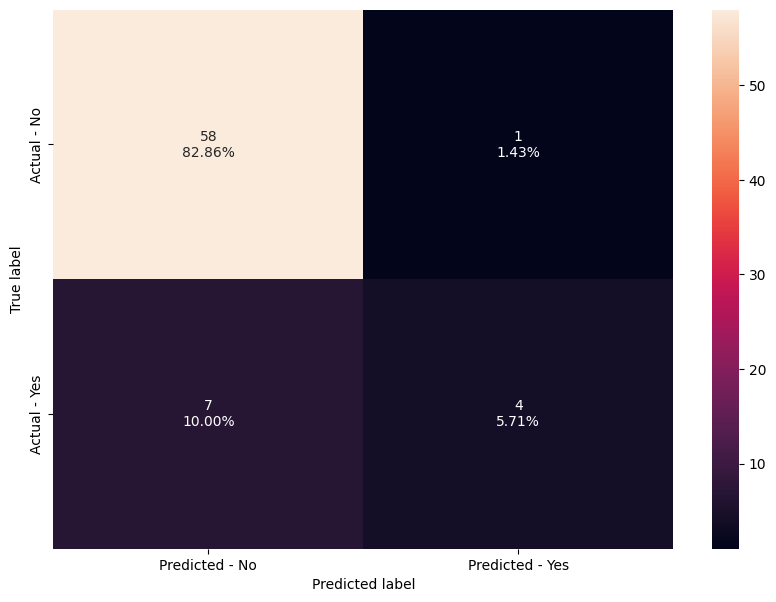

In [85]:
make_confusion_matrix(model, y_test, labels = [1, 0])